In [32]:

import pandas as pd

# Load the data
data = pd.read_csv("C:/Users/vamsh/Downloads/weatherHistory.csv")

In [36]:
# Convert 'Formatted Date' to datetime with error handling
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce')


In [37]:
# Check for any rows where the date parsing failed
invalid_dates = data['Formatted Date'].isna().sum()
if invalid_dates > 0:
    print(f'Warning: {invalid_dates} rows have invalid dates and will be dropped.')
# Drop rows with invalid dates
data = data.dropna(subset=['Formatted Date'])

In [38]:
# Confirm the conversion
print(data['Formatted Date'].dtype)

datetime64[ns, UTC]


In [39]:
# Extract date from the 'Formatted Date' column
data['Date'] = data['Formatted Date'].dt.date

In [40]:
# Group by date and calculate min and max temperature
daily_temp = data.groupby('Date')['Temperature (C)'].agg(['min', 'max']).reset_index()
daily_temp.columns = ['Date', 'Min Temperature', 'Max Temperature']

In [41]:

#  first few rows of the prepared data
print(daily_temp.head())

         Date  Min Temperature  Max Temperature
0  2005-12-31         0.577778         0.577778
1  2006-01-01         1.161111         7.438889
2  2006-01-02         1.694444         7.505556
3  2006-01-03         1.666667         2.900000
4  2006-01-04         1.666667         2.811111


# EDA

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
# Descriptive statistics
print(daily_temp.describe())

       Min Temperature  Max Temperature
count      4019.000000      4019.000000
mean          6.723089        16.983649
std           7.509552        10.284983
min         -21.822222       -10.000000
25%           1.111111         8.880556
50%           7.083333        17.627778
75%          12.800000        25.083333
max          23.016667        39.905556


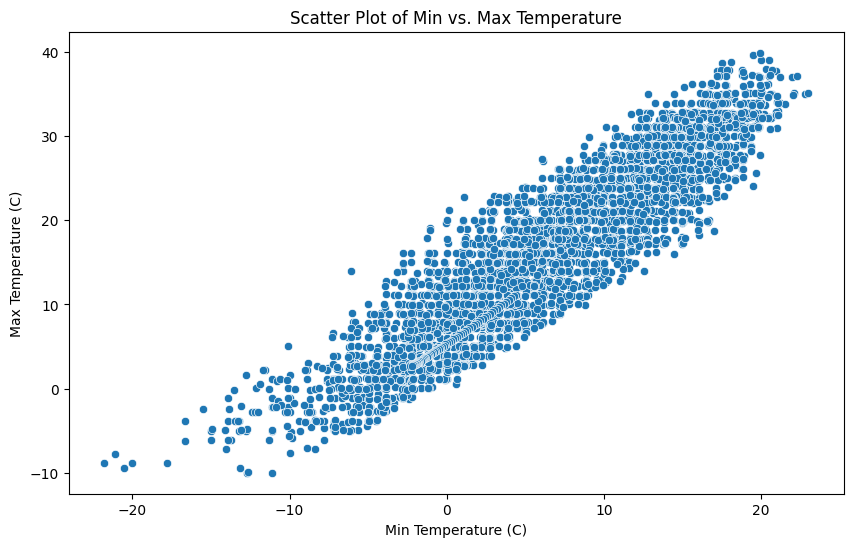

In [43]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min Temperature', y='Max Temperature', data=daily_temp)
plt.title('Scatter Plot of Min vs. Max Temperature')
plt.xlabel('Min Temperature (C)')
plt.ylabel('Max Temperature (C)')
plt.show()


In [44]:
# Correlation coefficient
correlation = daily_temp['Min Temperature'].corr(daily_temp['Max Temperature'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.9125825445280437


# Prediction Model

In [45]:
from sklearn.model_selection import train_test_split


In [46]:

# Prepare the data for modeling
X = daily_temp[['Min Temperature']]
y = daily_temp['Max Temperature']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)


In [48]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# predictions
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error as mse
# Evaluate the model
# Evaluate the model
rmse = mse(y_test, y_pred, squared=False)  # Use squared=False to compute RMSE
r2 = r2_score(y_test, y_pred)

C:\Users\vamsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Root Mean Squared Error: 4.331252178544337
R² Score: 0.8279537462008018
